In [1]:
import numpy as np
import os


In [2]:
import tensorflow as tf
devices = tf.config.experimental.list_physical_devices()
print(devices)
tf.config.experimental.set_memory_growth(devices[1],True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Rename Images
"""
I use to this dataset " https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset "
"""

In [3]:
import random
import glob
import shutil

In [4]:
""" os.chdir("Cats and Dogs Exercise/data")

if os.path.isdir("train/dog") is False :
    
    os.makedirs("train/dog")
    os.makedirs("train/cat")
    os.makedirs("valid/dog")
    os.makedirs("valid/cat")
    os.makedirs("test/dog")
    os.makedirs("test/cat")

    for c in random.sample(glob.glob("cat*"),1000):
        shutil.move(c,"train/cat")
    for c in random.sample(glob.glob("dog*"),1000):
        shutil.move(c,"train/dog")
    for c in random.sample(glob.glob("cat*"),200):
        shutil.move(c,"valid/cat")
    for c in random.sample(glob.glob("dog*"),200):
        shutil.move(c,"valid/dog")
    for c in random.sample(glob.glob("cat*"),100):
        shutil.move(c,"test/cat")
    for c in random.sample(glob.glob("dog*"),100):
        shutil.move(c,"test/dog")
    
os.chdir("../../") """

' os.chdir("Cats and Dogs Exercise/data")\n\nif os.path.isdir("train/dog") is False :\n    \n    os.makedirs("train/dog")\n    os.makedirs("train/cat")\n    os.makedirs("valid/dog")\n    os.makedirs("valid/cat")\n    os.makedirs("test/dog")\n    os.makedirs("test/cat")\n\n    for c in random.sample(glob.glob("cat*"),1000):\n        shutil.move(c,"train/cat")\n    for c in random.sample(glob.glob("dog*"),1000):\n        shutil.move(c,"train/dog")\n    for c in random.sample(glob.glob("cat*"),200):\n        shutil.move(c,"valid/cat")\n    for c in random.sample(glob.glob("dog*"),200):\n        shutil.move(c,"valid/dog")\n    for c in random.sample(glob.glob("cat*"),100):\n        shutil.move(c,"test/cat")\n    for c in random.sample(glob.glob("dog*"),100):\n        shutil.move(c,"test/dog")\n    \nos.chdir("../../") '

In [5]:
train_path ="data\\train"
test_path ="data\\test"
valid_path ="data\\valid"

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=True)
test_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=False)
valid_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),classes=["cat","dog"],batch_size=20)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
assert train_batchs.n == 2000
assert valid_batchs.n == 400
assert test_batchs.n == 200
assert train_batchs.num_classes == valid_batchs.num_classes == test_batchs.num_classes == 2

In [8]:
imgs,labels = next(train_batchs)
imgs,labels

(array([[[[ -79.939     , -102.779     ,   14.32      ],
          [ -68.939     ,  -90.779     ,   29.32      ],
          [ -72.939     ,  -93.779     ,   30.32      ],
          ...,
          [ -59.939003  ,  -95.779     ,   25.32      ],
          [ -58.939003  ,  -95.779     ,   27.32      ],
          [ -59.939003  ,  -94.779     ,   27.32      ]],
 
         [[ -70.939     ,  -93.779     ,   23.32      ],
          [ -60.939003  ,  -82.779     ,   37.32      ],
          [ -64.939     ,  -85.779     ,   38.32      ],
          ...,
          [ -53.939003  ,  -90.779     ,   32.32      ],
          [ -54.939003  ,  -89.779     ,   32.32      ],
          [ -53.939003  ,  -88.779     ,   33.32      ]],
 
         [[ -70.939     ,  -93.779     ,   23.32      ],
          [ -61.939003  ,  -83.779     ,   36.32      ],
          [ -65.939     ,  -86.779     ,   37.32      ],
          ...,
          [ -51.939003  ,  -86.779     ,   35.32      ],
          [ -50.939003  ,  -85.779   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

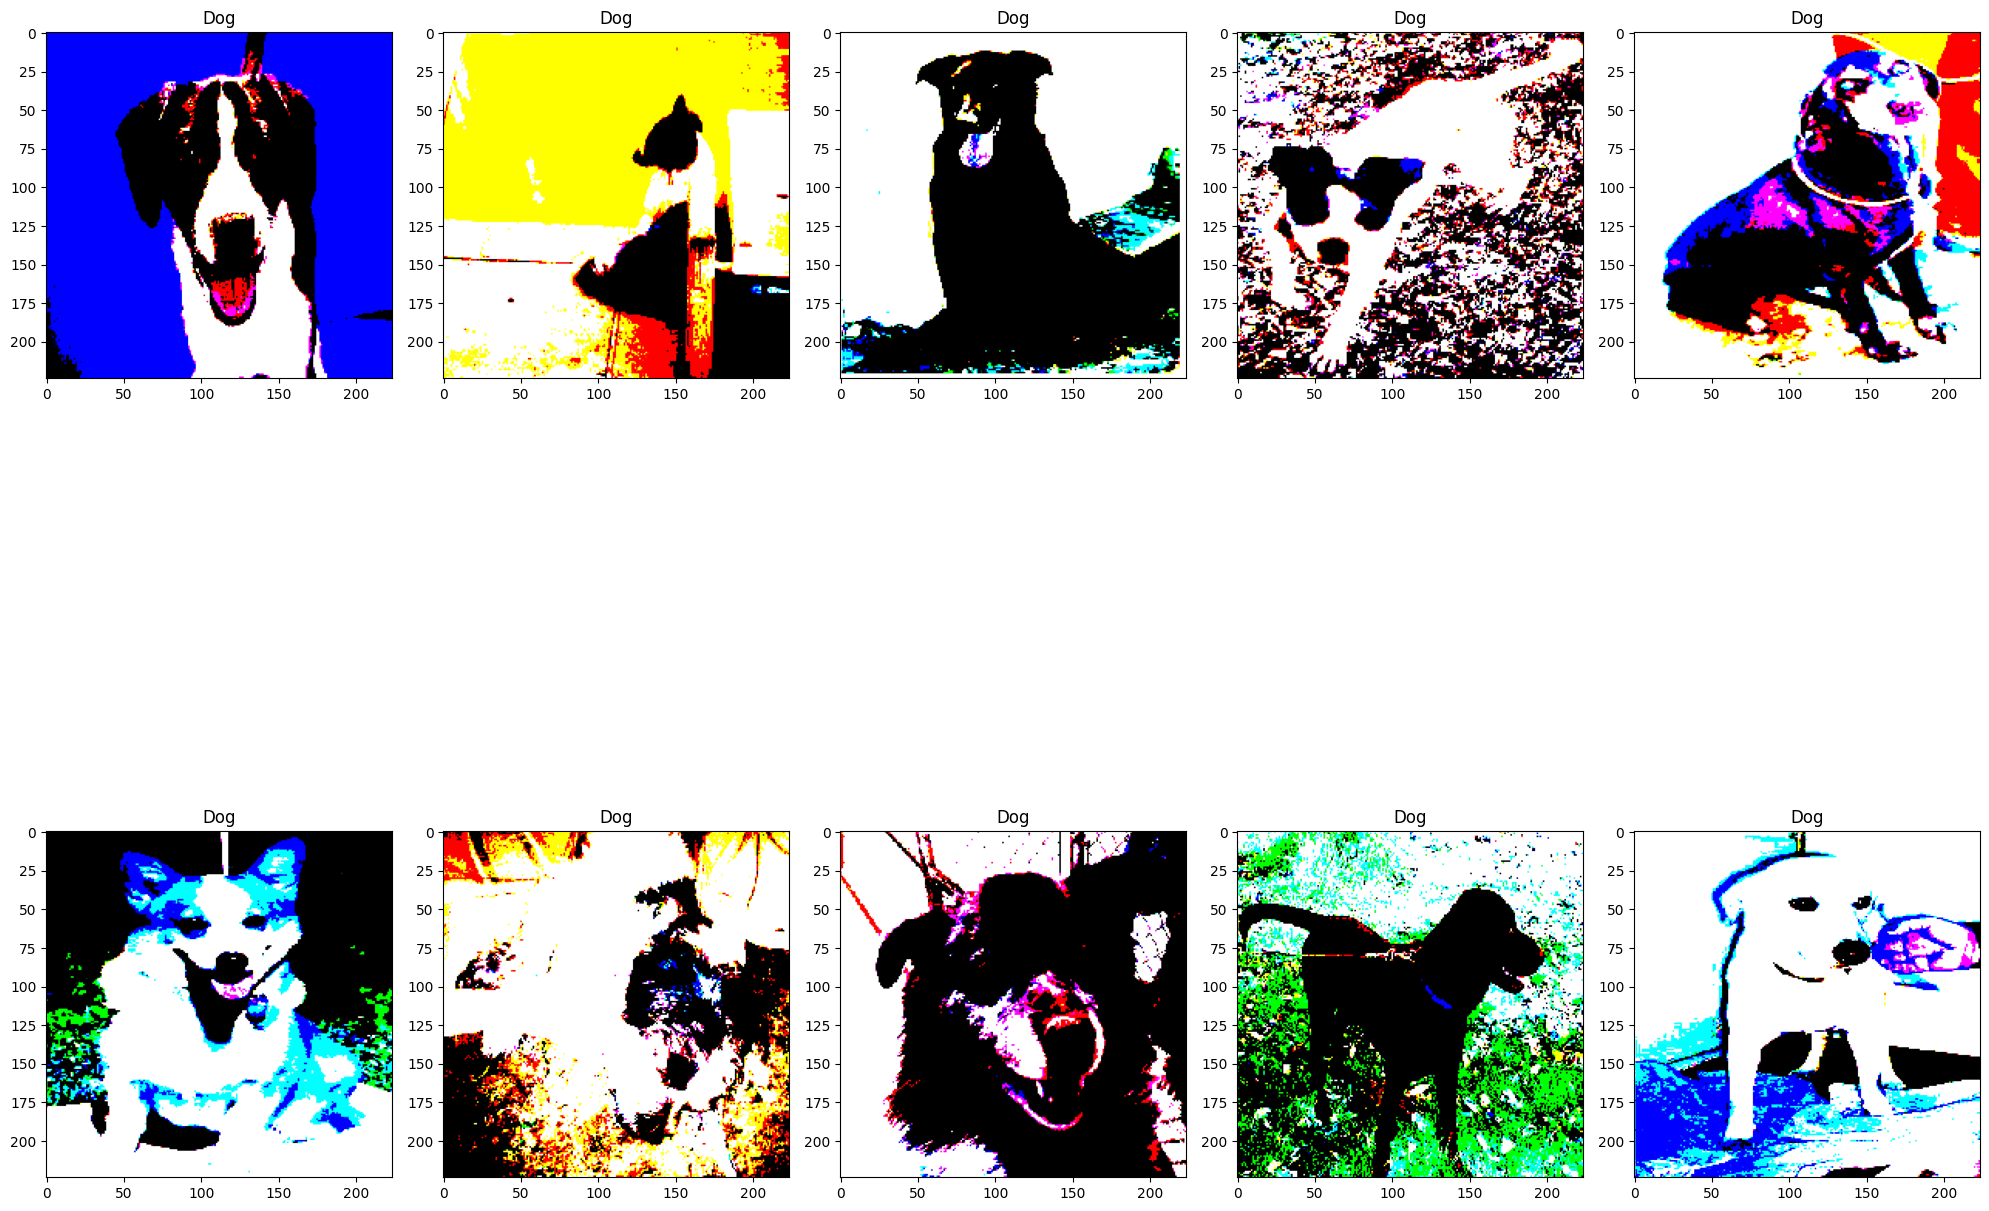

In [9]:
from matplotlib import pyplot as plt
def plotImages(images,labels):
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
       
        axe.imshow(image)
        axe.set_title("Cat" if label[0]== 1 else "Dog")

    plt.tight_layout()
    plt.show()
    
    
plotImages(imgs,labels)

Create Model

In [10]:
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.activations import relu

In [78]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(relu())
#model.add(Dense(units=16,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=2,activation="softmax"))

In [79]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                      

In [80]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=["accuracy"])

In [81]:
model.fit(x=train_batchs,validation_data=valid_batchs,epochs=20,verbose=1)

Epoch 1/20
100/100 [==============================] - 10s 93ms/step - loss: 6.1371 - accuracy: 0.5290 - val_loss: 1.7989 - val_accuracy: 0.6350
Epoch 2/20
100/100 [==============================] - 10s 95ms/step - loss: 2.3312 - accuracy: 0.6230 - val_loss: 1.3929 - val_accuracy: 0.6325
Epoch 3/20
100/100 [==============================] - 11s 110ms/step - loss: 1.4589 - accuracy: 0.6375 - val_loss: 0.9322 - val_accuracy: 0.6800
Epoch 4/20
100/100 [==============================] - 9s 91ms/step - loss: 0.9498 - accuracy: 0.6825 - val_loss: 0.8889 - val_accuracy: 0.6500
Epoch 5/20
100/100 [==============================] - 14s 143ms/step - loss: 0.7565 - accuracy: 0.6985 - val_loss: 0.7179 - val_accuracy: 0.6775
Epoch 6/20
100/100 [==============================] - 11s 106ms/step - loss: 0.5790 - accuracy: 0.7450 - val_loss: 0.7008 - val_accuracy: 0.6725
Epoch 7/20
100/100 [==============================] - 10s 100ms/step - loss: 0.5304 - accuracy: 0.7490 - val_loss: 0.6800 - val_accura

In [82]:
output = model.predict(x=test_batchs,verbose=0)
output

array([[9.76277649e-01, 2.37223934e-02],
       [6.54315531e-01, 3.45684499e-01],
       [9.81731713e-01, 1.82682388e-02],
       [2.33486164e-02, 9.76651371e-01],
       [9.89269018e-02, 9.01073039e-01],
       [9.79133666e-01, 2.08663773e-02],
       [8.95719945e-01, 1.04280077e-01],
       [9.66927230e-01, 3.30728255e-02],
       [9.98877227e-01, 1.12278829e-03],
       [9.88865316e-01, 1.11346869e-02],
       [5.37828982e-01, 4.62170988e-01],
       [9.81627166e-01, 1.83727834e-02],
       [1.54196285e-02, 9.84580398e-01],
       [9.70455766e-01, 2.95442678e-02],
       [3.94088328e-02, 9.60591137e-01],
       [1.61033496e-01, 8.38966489e-01],
       [9.33480561e-01, 6.65194765e-02],
       [9.66956198e-01, 3.30438092e-02],
       [9.78410184e-01, 2.15897877e-02],
       [3.39073598e-01, 6.60926402e-01],
       [9.89266276e-01, 1.07337348e-02],
       [9.23111737e-01, 7.68882781e-02],
       [8.32606733e-01, 1.67393297e-01],
       [7.08245218e-01, 2.91754752e-01],
       [7.829738

In [83]:
predict_labels = np.argmax(output,axis=1)

In [84]:
predict_labels

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [85]:
true_labels = np.where(predict_labels == test_batchs.classes)

print((len(true_labels[0])/len(test_batchs.classes)))

0.745


In [86]:
imgs,labels = next(test_batchs)
print(imgs.shape)
print(predict_labels.shape)
print(labels.shape)

(20, 224, 224, 3)
(200,)
(20, 2)


In [87]:
def plotPredictedImages(images,labels):
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
        
        axe.imshow(image)
        axe.set_title("Cat" if label== 0 else "Dog")

    plt.tight_layout()
    plt.show()
    
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

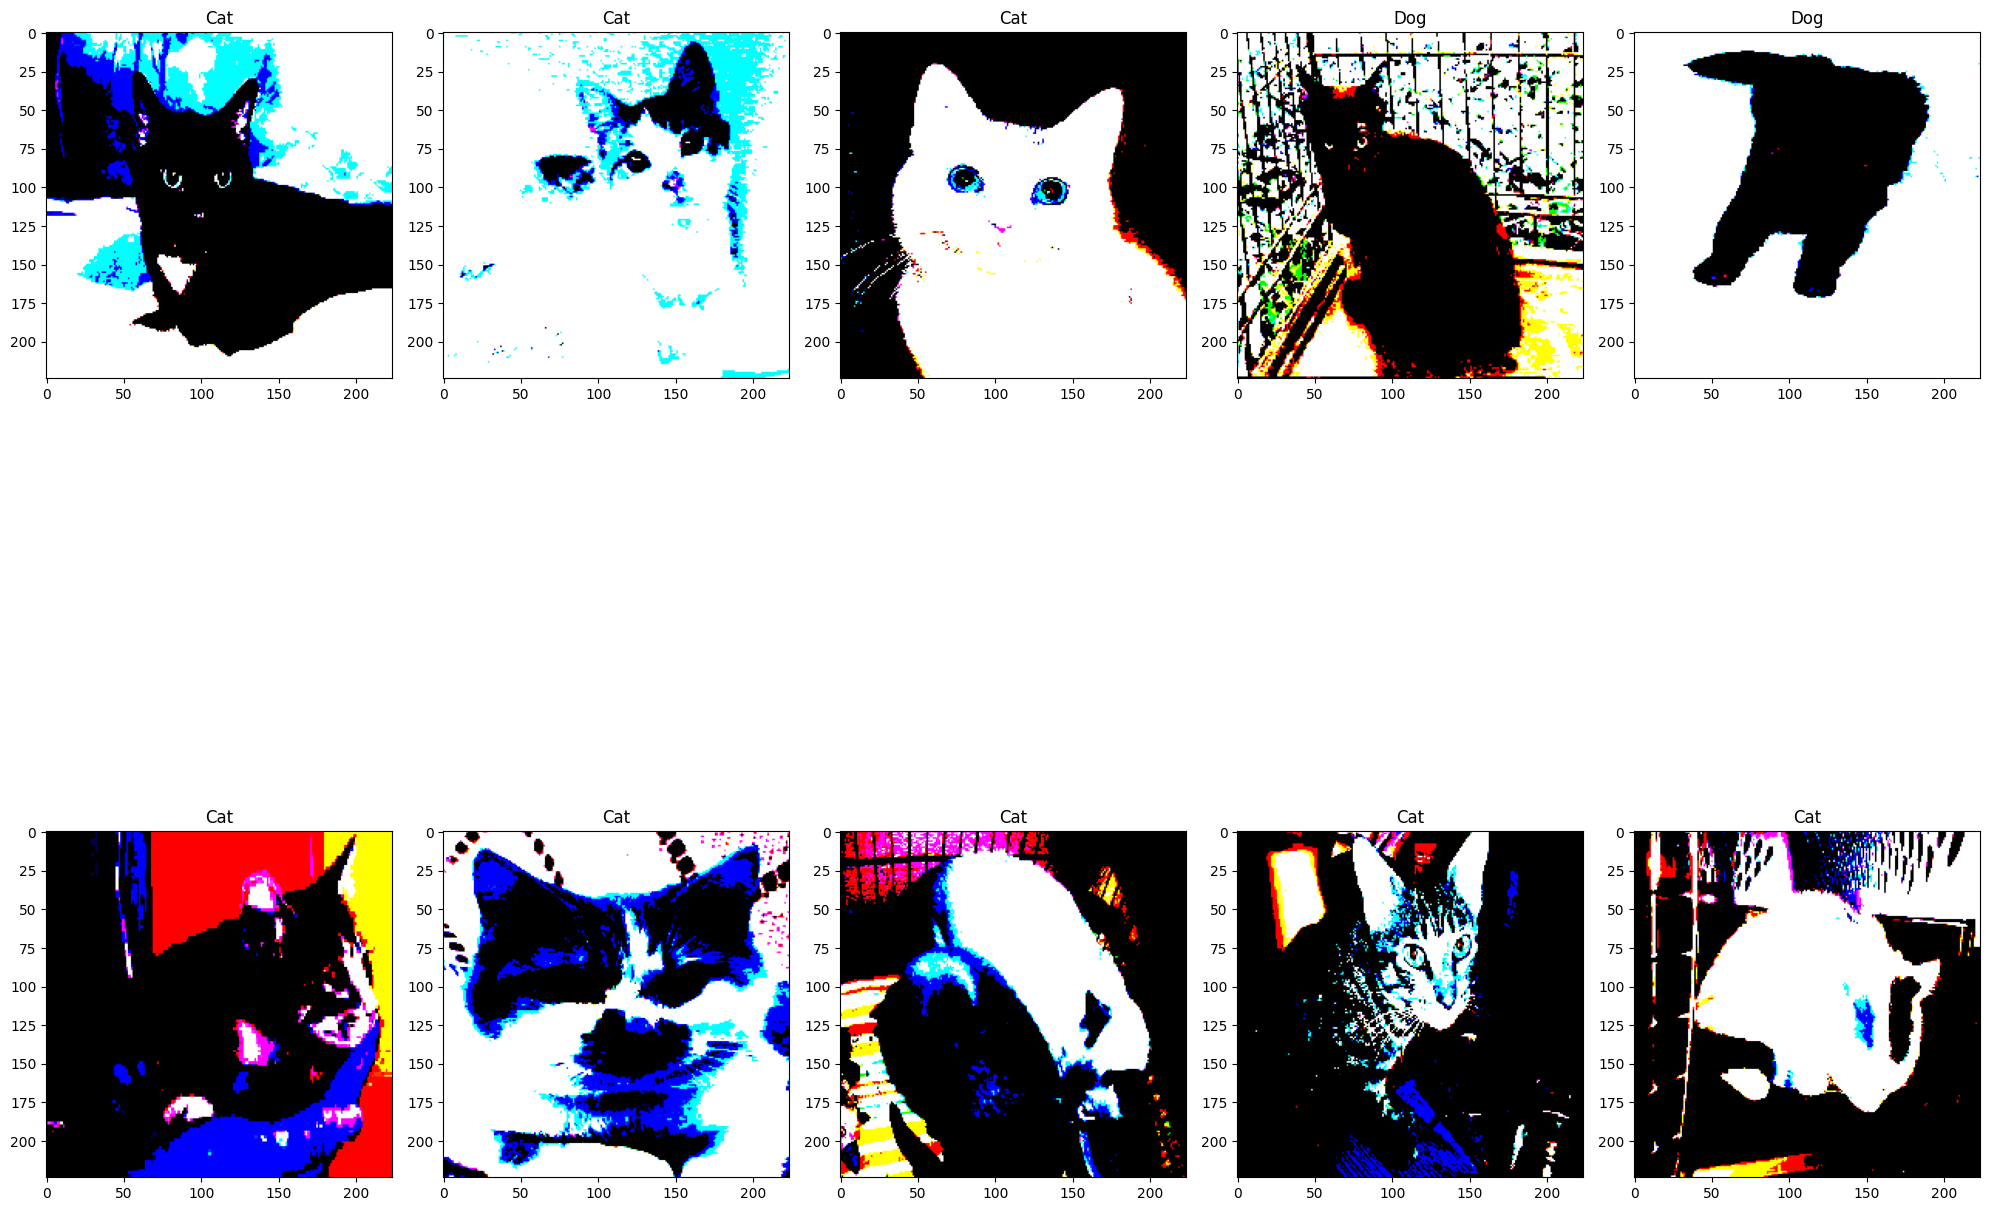

In [88]:
plotPredictedImages(imgs,predict_labels)

In [90]:
import os 

if os.path.isdir("model/myModel.h5") is False:
    model.save("model/myModel.h5")


In [91]:
## Confusion matrix

In [92]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [93]:
cm = confusion_matrix(test_batchs.classes,predict_labels)

In [94]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [95]:
test_batchs.class_indices

{'cat': 0, 'dog': 1}

[[82 18]
 [33 67]]


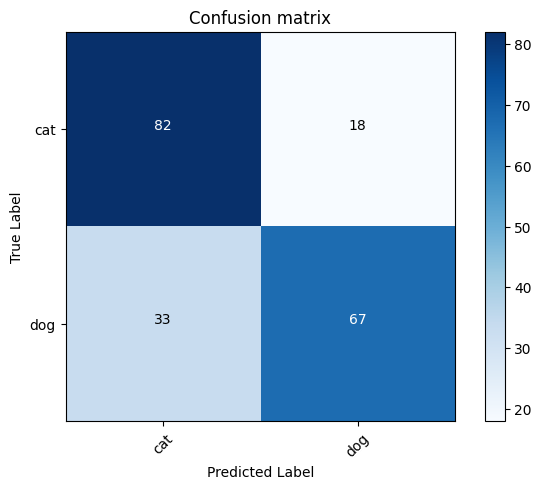

In [96]:
cm_plot_labels = ["cat","dog"]
plot_confusion_matrix(cm,cm_plot_labels)

In [43]:
del model

VGG16 Model

In [44]:
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

In [45]:
vgg16 = VGG16()

In [46]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [48]:
vgg16_model =  Sequential()

for layer in vgg16.layers[:-1]:
    vgg16_model.add(layer)

for layer in vgg16_model.layers:
    layer.trainable = False

In [49]:
vgg16_model.add(Dense(units=2,activation="softmax"))

In [50]:
vgg16_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [51]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=["accuracy"])

VGG16 Model Train

In [52]:
train_path ="data\\train"
test_path ="data\\test"
valid_path ="data\\valid"

In [53]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=True)
test_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=False)
valid_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),classes=["cat","dog"],batch_size=20)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [55]:
vgg16_model.fit(x=train_batchs,validation_data=valid_batchs,epochs=5,verbose=1)

Epoch 1/5
100/100 [==============================] - 23s 233ms/step - loss: 0.1774 - accuracy: 0.9325 - val_loss: 0.1321 - val_accuracy: 0.9550
Epoch 2/5
100/100 [==============================] - 24s 237ms/step - loss: 0.0876 - accuracy: 0.9690 - val_loss: 0.1004 - val_accuracy: 0.9650
Epoch 3/5
100/100 [==============================] - 23s 235ms/step - loss: 0.0641 - accuracy: 0.9775 - val_loss: 0.0892 - val_accuracy: 0.9700
Epoch 4/5
100/100 [==============================] - 25s 254ms/step - loss: 0.0509 - accuracy: 0.9875 - val_loss: 0.0998 - val_accuracy: 0.9625
Epoch 5/5
100/100 [==============================] - 24s 235ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0798 - val_accuracy: 0.9725


Predict VGG16 Model

In [56]:
output_vgg16 = vgg16_model.predict(x=test_batchs,verbose=0)
output_vgg16

array([[9.98951912e-01, 1.04808877e-03],
       [9.98656154e-01, 1.34380662e-03],
       [9.99930382e-01, 6.96576826e-05],
       [9.99992251e-01, 7.70119004e-06],
       [9.99486804e-01, 5.13165898e-04],
       [9.99992609e-01, 7.34665900e-06],
       [9.99944329e-01, 5.56243467e-05],
       [9.99911785e-01, 8.81793094e-05],
       [9.98462081e-01, 1.53788202e-03],
       [1.00000000e+00, 5.46756453e-08],
       [9.99947190e-01, 5.28298697e-05],
       [9.99649286e-01, 3.50684248e-04],
       [9.99939561e-01, 6.04664347e-05],
       [9.99945164e-01, 5.48344397e-05],
       [3.21325332e-01, 6.78674698e-01],
       [9.99921441e-01, 7.85008160e-05],
       [9.80257452e-01, 1.97424982e-02],
       [9.99955058e-01, 4.49384934e-05],
       [9.98695314e-01, 1.30476325e-03],
       [9.99784172e-01, 2.15790933e-04],
       [9.99397516e-01, 6.02485903e-04],
       [9.99898076e-01, 1.01956764e-04],
       [9.99544322e-01, 4.55689558e-04],
       [9.98967767e-01, 1.03220739e-03],
       [9.974156

In [57]:
predict_labels_vgg16 = np.argmax(output_vgg16,axis=1)
predict_labels_vgg16

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [58]:
true_labels_vgg16 = np.where(predict_labels_vgg16 == test_batchs.classes)

print((len(true_labels_vgg16[0])/len(test_batchs.classes)))

0.96


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

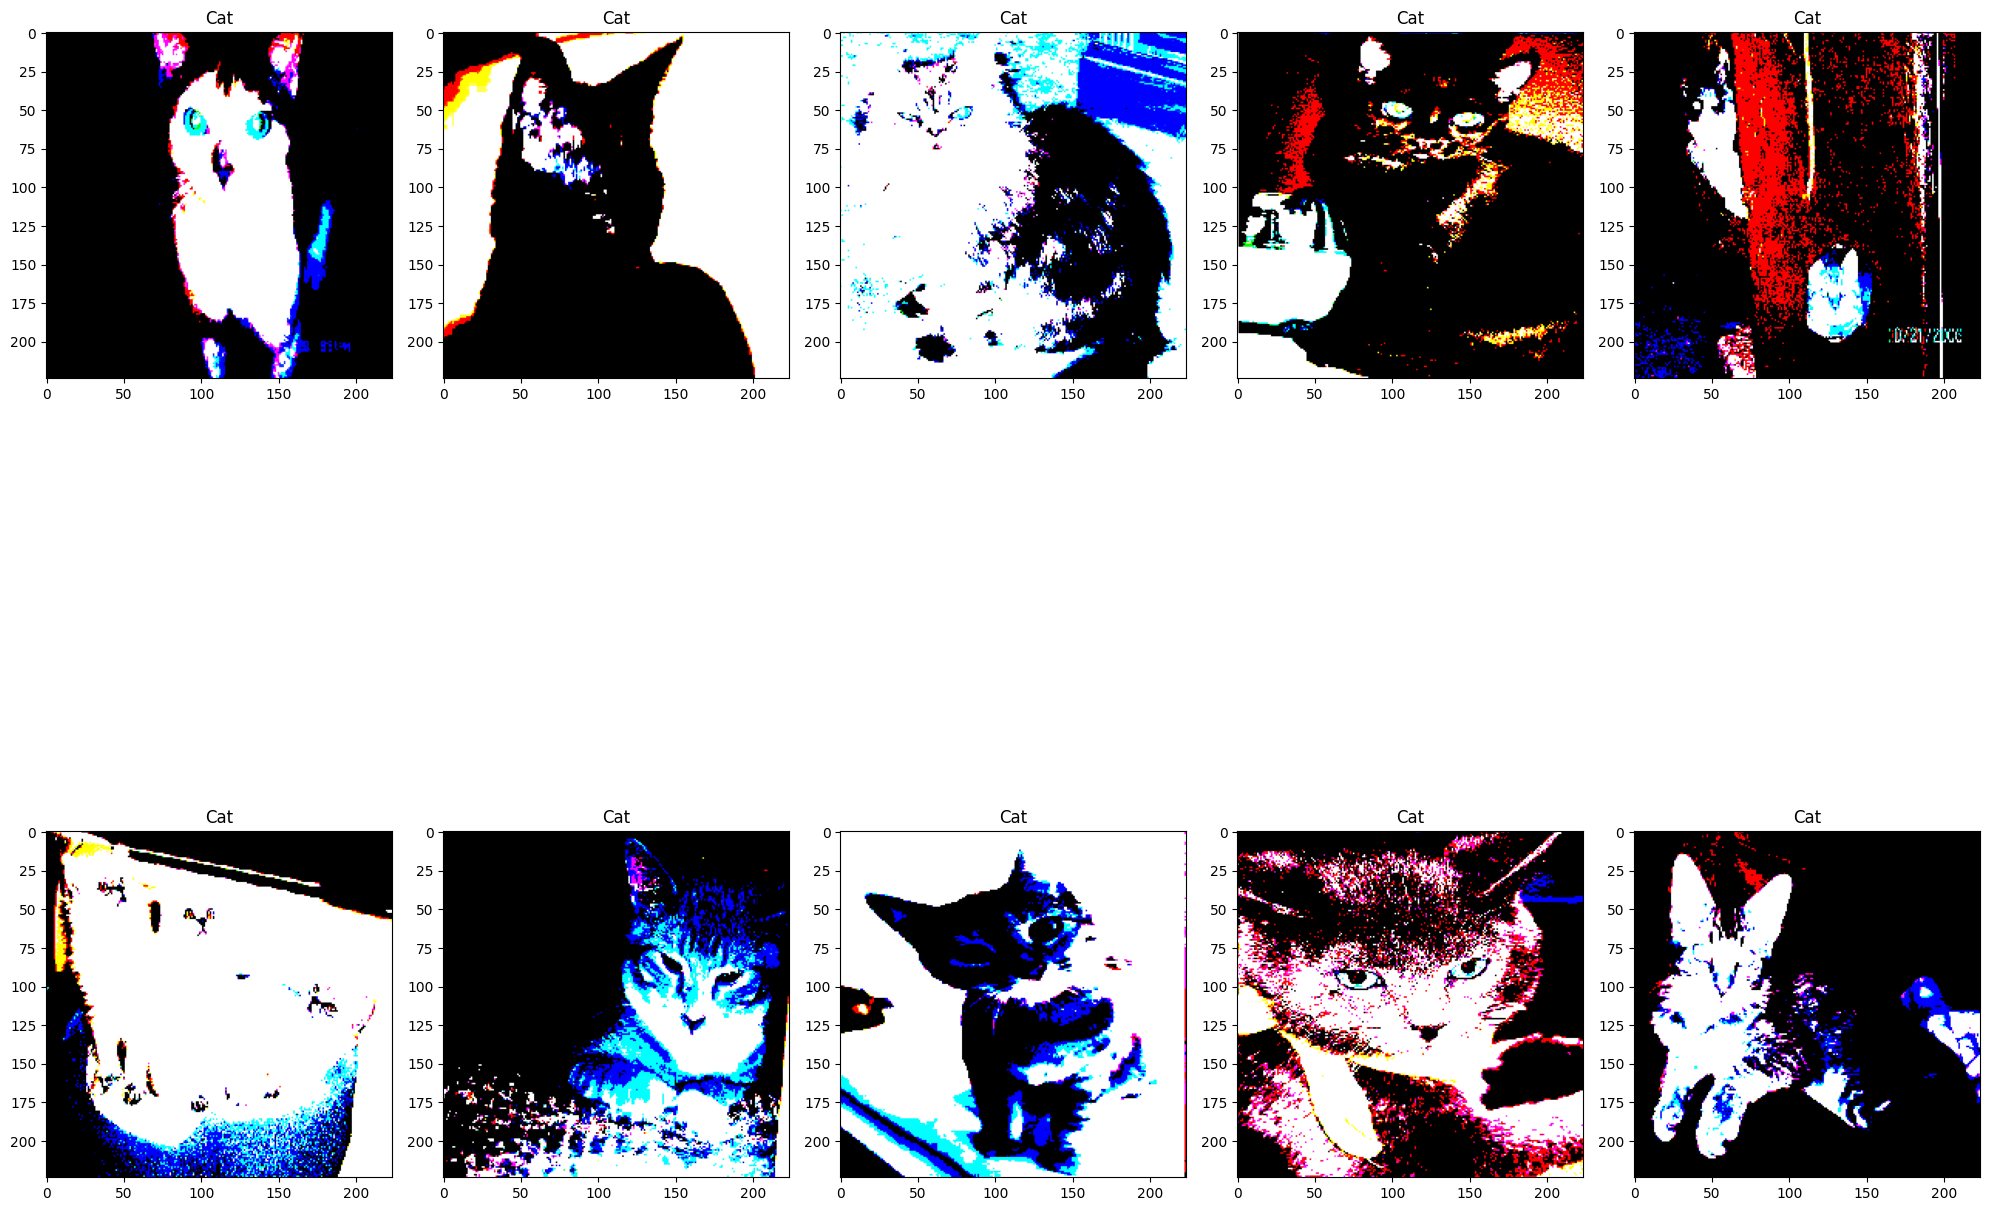

In [59]:

def plotPredictedImages(images,labels):
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
        
        axe.imshow(image)
        axe.set_title("Cat" if label== 0 else "Dog")

    plt.tight_layout()
    plt.show()
    
    

plotPredictedImages(imgs,predict_labels_vgg16)

In [60]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [61]:
cm = confusion_matrix(test_batchs.classes,predict_labels_vgg16)

In [62]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

[[96  4]
 [ 4 96]]


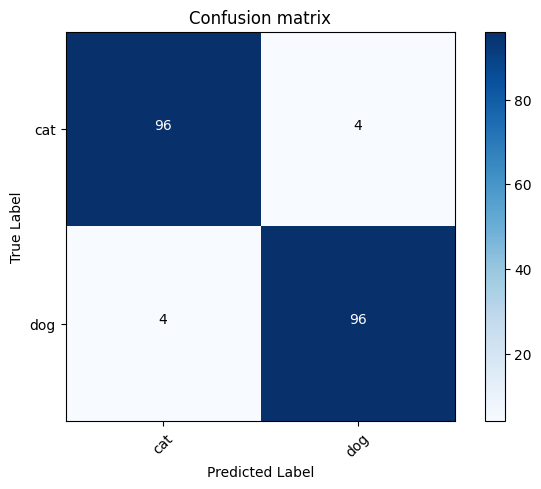

In [63]:
cm_plot_labels = ["cat","dog"]
plot_confusion_matrix(cm,cm_plot_labels)

In [65]:
import os 

if os.path.isdir("model/model.h5") is False:
    vgg16_model.save("model/model.h5")